# Old Training

In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns

In [2]:
df = pd.read_csv('dataset1.txt',sep=';')

In [3]:
df.columns = ['text','sentiment']

In [4]:
df['sentiment'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [5]:
df

,text,sentiment
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


In [6]:
df.isna().sum()

text         0
sentiment    0
dtype: int64

joy         5362
sadness     4665
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiment, dtype: int64


/home/shirshak/anaconda3/envs/major_project/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: ylabel='sentiment'>

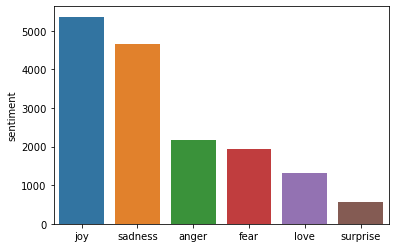

In [7]:
# Class Distribution
x = df['sentiment'].value_counts()
print(x)
sns.barplot(x.index,x)

In [8]:
df

,text,sentiment
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


In [9]:
import string 

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
import spacy 

In [12]:
# import nltk 
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# len(stopwords)

In [13]:
import spacy 

In [14]:
my_nlp = spacy.load("en_core_web_sm")

In [15]:
stopwords = my_nlp.Defaults.stop_words

In [16]:
len(stopwords)

326

In [17]:
# doc = my_nlp("HEllo I am shirshak acharya following moving playing played an amazing fellow here at fusemachines")

In [18]:
# lemmatized_words = []

In [19]:
# for token in doc:
#     lemma = token.lemma_
#     lemmatized_words.append(lemma)

In [20]:
# lemmatized_words

In [21]:
def text_preprocessing(text):
    my_nlp = spacy.load("en_core_web_sm")
    my_tokens = no_stopword_tokens = final_tokens = []
    #removing punctuations
    my_text = "".join([i for i in text if i not in string.punctuation])
    # lowering text
    my_text = my_text.lower()
    # tokenization
    doc = my_nlp(my_text)
    my_tokens = [token.text for token in doc]
    #removing stopwords
    no_stopword_tokens = [i for i in my_tokens if i not in stopwords]
    
    # the lemmatizer expects doesnot accept string values 
    # hence we need to make it spacy sentence
    text = ' '.join(no_stopword_tokens)
    text = my_nlp(text)
    final_tokens = [i.lemma_ for i in text]
    return final_tokens

In [22]:
tokens = text_preprocessing("explaining I am .shirshak acharya; an amazing fell!ow here at fusemachines")

In [23]:
tokens

['explain', 'shirshak', 'acharya', 'amazing', 'fellow', 'fusemachine']

In [24]:
df['text'] = df['text'].apply(lambda x: text_preprocessing(x))

In [25]:
df.to_csv('preprocessed_text.csv',index=False)

# old 2nd  TRAINING 

In [55]:
from sklearn import preprocessing 
import pandas as pd

In [56]:
my_df = pd.read_csv('preprocessed_text.csv')

In [57]:
my_df

,text,sentiment
0,"['feel', 'hopeless', 'damned', 'hopeful', 'car...",sadness
1,"['m', 'grab', 'minute', 'post', 'feel', 'greed...",anger
2,"['feel', 'nostalgic', 'fireplace', 'know', 'pr...",love
3,"['feel', 'grouchy']",anger
4,"['ve', 'feel', 'little', 'burden', 'lately', '...",sadness
...,...,...
15994,"['brief', 'time', 'beanbag', 'say', 'anna', 'f...",sadness
15995,"['turn', 'feel', 'pathetic', 'waiting', 'table...",sadness
15996,"['feel', 'strong', 'good', 'overall']",joy
15997,"['feel', 'like', 'rude', 'comment', 'm', 'glad...",anger


In [58]:
my_label_encoder = preprocessing.LabelEncoder()

In [59]:
my_df['sentiment'] = my_label_encoder.fit_transform(my_df['sentiment'])

In [60]:
my_df

,text,sentiment
0,"['feel', 'hopeless', 'damned', 'hopeful', 'car...",4
1,"['m', 'grab', 'minute', 'post', 'feel', 'greed...",0
2,"['feel', 'nostalgic', 'fireplace', 'know', 'pr...",3
3,"['feel', 'grouchy']",0
4,"['ve', 'feel', 'little', 'burden', 'lately', '...",4
...,...,...
15994,"['brief', 'time', 'beanbag', 'say', 'anna', 'f...",4
15995,"['turn', 'feel', 'pathetic', 'waiting', 'table...",4
15996,"['feel', 'strong', 'good', 'overall']",2
15997,"['feel', 'like', 'rude', 'comment', 'm', 'glad...",0


In [61]:
my_df['text']

0        ['feel', 'hopeless', 'damned', 'hopeful', 'car...
1        ['m', 'grab', 'minute', 'post', 'feel', 'greed...
2        ['feel', 'nostalgic', 'fireplace', 'know', 'pr...
3                                      ['feel', 'grouchy']
4        ['ve', 'feel', 'little', 'burden', 'lately', '...
                               ...                        
15994    ['brief', 'time', 'beanbag', 'say', 'anna', 'f...
15995    ['turn', 'feel', 'pathetic', 'waiting', 'table...
15996                ['feel', 'strong', 'good', 'overall']
15997    ['feel', 'like', 'rude', 'comment', 'm', 'glad...
15998         ['know', 'lot', 'feel', 'stupid', 'portray']
Name: text, Length: 15999, dtype: object

In [62]:
arr = my_df['text'][1]

In [63]:
arr

"['m', 'grab', 'minute', 'post', 'feel', 'greedy', 'wrong']"

In [64]:
import ast    # for removing the "" because we need to remove short text from list and it was string 

In [65]:
arr = ast.literal_eval(arr)
arr

['m', 'grab', 'minute', 'post', 'feel', 'greedy', 'wrong']

In [66]:
def remove_short_text(text_list,min_length):
    text_list = ast.literal_eval(text_list)
    return [text for text in text_list if len(text) >= min_length]

In [67]:
remove_short_text(my_df['text'][1],3)

['grab', 'minute', 'post', 'feel', 'greedy', 'wrong']

In [68]:
my_df['token_text'] = my_df['text'].apply(lambda x: remove_short_text(x,3))

In [69]:
my_df['token_text'][0]

['feel', 'hopeless', 'damned', 'hopeful', 'care', 'awake']

In [70]:
my_df

,text,sentiment,token_text
0,"['feel', 'hopeless', 'damned', 'hopeful', 'car...",4,"[feel, hopeless, damned, hopeful, care, awake]"
1,"['m', 'grab', 'minute', 'post', 'feel', 'greed...",0,"[grab, minute, post, feel, greedy, wrong]"
2,"['feel', 'nostalgic', 'fireplace', 'know', 'pr...",3,"[feel, nostalgic, fireplace, know, property]"
3,"['feel', 'grouchy']",0,"[feel, grouchy]"
4,"['ve', 'feel', 'little', 'burden', 'lately', '...",4,"[feel, little, burden, lately, not, sure]"
...,...,...,...
15994,"['brief', 'time', 'beanbag', 'say', 'anna', 'f...",4,"[brief, time, beanbag, say, anna, feel, like, ..."
15995,"['turn', 'feel', 'pathetic', 'waiting', 'table...",4,"[turn, feel, pathetic, waiting, table, sub, te..."
15996,"['feel', 'strong', 'good', 'overall']",2,"[feel, strong, good, overall]"
15997,"['feel', 'like', 'rude', 'comment', 'm', 'glad...",0,"[feel, like, rude, comment, glad]"


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
def join_words(text):
    return " ".join(text)

In [73]:
my_df['final'] = my_df['token_text'].apply(lambda x: join_words(x))

In [74]:
cv = CountVectorizer()
my_bag = cv.fit_transform(my_df['final'])

In [75]:
my_vocab = cv.vocabulary_

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(my_bag,my_df['sentiment'],test_size=0.1)

In [78]:
X_train

<14399x11870 sparse matrix of type '<class 'numpy.int64'>'
	with 109802 stored elements in Compressed Sparse Row format>

In [79]:
y_train

7326     3
7345     2
12237    3
13138    4
6141     2
        ..
9051     4
10373    3
2744     0
12786    4
5286     4
Name: sentiment, Length: 14399, dtype: int64

In [80]:
X_train

<14399x11870 sparse matrix of type '<class 'numpy.int64'>'
	with 109802 stored elements in Compressed Sparse Row format>

In [81]:
# X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train)#, columns=['text'])

In [82]:
# X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test)

In [83]:
# aaa = X_train_df.assign(label=y_train)
# bbb = X_test_df.assign(label=y_test)
# aaa.to_csv("Xy_train.csv",index=False)
# bbb.to_csv("Xy_test.csv",index=False)

In [84]:
# aa = pd.read_csv("Xy_train.csv")
# bb = pd.read_csv("Xy_test.csv")

In [85]:
# X_train = aa['text']
# y_train = aa['label']
# X_test = bb['text']
# y_test = bb['label']

In [86]:
# X_train

In [87]:
# X_train.dtype

In [88]:
# from scipy import sparse

In [89]:
# X_train = sparse.csr_matrix(X_train)
# X_test = sparse.csr_matrix(X_test)

In [90]:
from scipy.sparse import save_npz, load_npz

In [91]:
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [92]:
save_npz('X_train.npz', X_train)
save_npz('X_test.npz',X_test)

# saving vocabulary 

In [93]:
my_vocab

{'feel': 3827,
 'hopeless': 4967,
 'damned': 2471,
 'hopeful': 4965,
 'care': 1492,
 'awake': 737,
 'grab': 4474,
 'minute': 6686,
 'post': 8027,
 'greedy': 4524,
 'wrong': 11763,
 'nostalgic': 7183,
 'fireplace': 3928,
 'know': 5852,
 'property': 8232,
 'grouchy': 4552,
 'little': 6147,
 'burden': 1362,
 'lately': 5936,
 'not': 7186,
 'sure': 10209,
 'take': 10331,
 'milligrams': 6653,
 'time': 10603,
 'recommend': 8523,
 'fall': 3741,
 'asleep': 613,
 'lot': 6229,
 'fast': 3779,
 'like': 6095,
 'funny': 4237,
 'confused': 2067,
 'life': 6078,
 'teenager': 10415,
 'jade': 5550,
 'year': 11801,
 'old': 7323,
 'man': 6371,
 'petrona': 7783,
 'petronas': 7784,
 'perform': 7723,
 'huge': 5016,
 'profit': 8201,
 'romantic': 8886,
 'suffer': 10138,
 'see': 9188,
 'mean': 6509,
 'run': 8951,
 'divine': 2987,
 'experience': 3659,
 'expect': 3652,
 'type': 10916,
 'spiritual': 9811,
 'encounter': 3391,
 'think': 10530,
 'easy': 3221,
 'dissatisfied': 2949,
 'low': 6253,
 'energy': 3415,
 'thir

In [96]:
import pickle
with open('my_vocabulary.pkl', 'wb') as f:
    pickle.dump(my_vocab, f)

In [45]:
# bag of words is in this sparse matrix

# <15999x11870 sparse matrix of type '<class 'numpy.int64'>'
# 	with 121739 stored elements in Compressed Sparse Row format>

# so saving bag of words in compressed file like X_train and X_test 

In [46]:
# save_npz('bag_of_words.npz', my_bag)

# New training

In [36]:
X_train = load_npz('X_train.npz')
X_test = load_npz('X_test.npz')

In [37]:
X_train

<14399x11870 sparse matrix of type '<class 'numpy.int64'>'
	with 109586 stored elements in Compressed Sparse Row format>

In [76]:
y_train = pd.read_csv('y_train.csv')['sentiment']
y_test = pd.read_csv('y_test.csv')['sentiment']

In [38]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.090656
0:	learn: 1.7520432	total: 126ms	remaining: 2m 5s
1:	learn: 1.7197055	total: 203ms	remaining: 1m 41s
2:	learn: 1.6937941	total: 271ms	remaining: 1m 30s
3:	learn: 1.6697874	total: 339ms	remaining: 1m 24s
4:	learn: 1.6492730	total: 409ms	remaining: 1m 21s
5:	learn: 1.6309350	total: 479ms	remaining: 1m 19s
6:	learn: 1.6152097	total: 544ms	remaining: 1m 17s
7:	learn: 1.6011486	total: 614ms	remaining: 1m 16s
8:	learn: 1.5839533	total: 680ms	remaining: 1m 14s
9:	learn: 1.5704748	total: 747ms	remaining: 1m 13s
10:	learn: 1.5591396	total: 837ms	remaining: 1m 15s
11:	learn: 1.5484397	total: 903ms	remaining: 1m 14s
12:	learn: 1.5390876	total: 975ms	remaining: 1m 14s
13:	learn: 1.5288343	total: 1.04s	remaining: 1m 13s
14:	learn: 1.5212911	total: 1.11s	remaining: 1m 12s
15:	learn: 1.5121736	total: 1.18s	remaining: 1m 12s
16:	learn: 1.5032929	total: 1.25s	remaining: 1m 12s
17:	learn: 1.4964807	total: 1.31s	remaining: 1m 11s
18:	learn: 1.4899850	total: 1.39s	remaining: 

161:	learn: 1.0612977	total: 11.9s	remaining: 1m 1s
162:	learn: 1.0592786	total: 12s	remaining: 1m 1s
163:	learn: 1.0576374	total: 12s	remaining: 1m 1s
164:	learn: 1.0559028	total: 12.1s	remaining: 1m 1s
165:	learn: 1.0542268	total: 12.2s	remaining: 1m 1s
166:	learn: 1.0525347	total: 12.3s	remaining: 1m 1s
167:	learn: 1.0509050	total: 12.4s	remaining: 1m 1s
168:	learn: 1.0493136	total: 12.5s	remaining: 1m 1s
169:	learn: 1.0475651	total: 12.6s	remaining: 1m 1s
170:	learn: 1.0459521	total: 12.7s	remaining: 1m 1s
171:	learn: 1.0443056	total: 12.8s	remaining: 1m 1s
172:	learn: 1.0427103	total: 12.9s	remaining: 1m 1s
173:	learn: 1.0410978	total: 12.9s	remaining: 1m 1s
174:	learn: 1.0395525	total: 13s	remaining: 1m 1s
175:	learn: 1.0379639	total: 13.1s	remaining: 1m 1s
176:	learn: 1.0361777	total: 13.1s	remaining: 1m 1s
177:	learn: 1.0345865	total: 13.2s	remaining: 1m 1s
178:	learn: 1.0328627	total: 13.3s	remaining: 1m
179:	learn: 1.0312160	total: 13.4s	remaining: 1m
180:	learn: 1.0289143	to

321:	learn: 0.8496680	total: 23.7s	remaining: 49.8s
322:	learn: 0.8486659	total: 23.7s	remaining: 49.8s
323:	learn: 0.8476813	total: 23.8s	remaining: 49.7s
324:	learn: 0.8468075	total: 23.9s	remaining: 49.6s
325:	learn: 0.8459255	total: 24s	remaining: 49.5s
326:	learn: 0.8448520	total: 24s	remaining: 49.4s
327:	learn: 0.8439080	total: 24.1s	remaining: 49.4s
328:	learn: 0.8429958	total: 24.2s	remaining: 49.3s
329:	learn: 0.8418177	total: 24.2s	remaining: 49.2s
330:	learn: 0.8406879	total: 24.3s	remaining: 49.1s
331:	learn: 0.8396587	total: 24.4s	remaining: 49s
332:	learn: 0.8386355	total: 24.4s	remaining: 48.9s
333:	learn: 0.8377452	total: 24.5s	remaining: 48.9s
334:	learn: 0.8365542	total: 24.6s	remaining: 48.8s
335:	learn: 0.8356066	total: 24.6s	remaining: 48.7s
336:	learn: 0.8346966	total: 24.7s	remaining: 48.6s
337:	learn: 0.8336622	total: 24.8s	remaining: 48.5s
338:	learn: 0.8327272	total: 24.9s	remaining: 48.5s
339:	learn: 0.8317292	total: 24.9s	remaining: 48.4s
340:	learn: 0.8309

481:	learn: 0.7212510	total: 34.9s	remaining: 37.5s
482:	learn: 0.7205767	total: 34.9s	remaining: 37.4s
483:	learn: 0.7199282	total: 35s	remaining: 37.3s
484:	learn: 0.7192108	total: 35.1s	remaining: 37.2s
485:	learn: 0.7185164	total: 35.1s	remaining: 37.2s
486:	learn: 0.7179613	total: 35.2s	remaining: 37.1s
487:	learn: 0.7173051	total: 35.3s	remaining: 37s
488:	learn: 0.7167199	total: 35.3s	remaining: 36.9s
489:	learn: 0.7161710	total: 35.4s	remaining: 36.9s
490:	learn: 0.7155705	total: 35.5s	remaining: 36.8s
491:	learn: 0.7149333	total: 35.5s	remaining: 36.7s
492:	learn: 0.7142988	total: 35.6s	remaining: 36.6s
493:	learn: 0.7136716	total: 35.7s	remaining: 36.6s
494:	learn: 0.7131197	total: 35.8s	remaining: 36.5s
495:	learn: 0.7124312	total: 35.8s	remaining: 36.4s
496:	learn: 0.7119411	total: 35.9s	remaining: 36.3s
497:	learn: 0.7112993	total: 36s	remaining: 36.3s
498:	learn: 0.7107235	total: 36s	remaining: 36.2s
499:	learn: 0.7100524	total: 36.1s	remaining: 36.1s
500:	learn: 0.708455

641:	learn: 0.6349232	total: 46.4s	remaining: 25.9s
642:	learn: 0.6343861	total: 46.4s	remaining: 25.8s
643:	learn: 0.6339024	total: 46.5s	remaining: 25.7s
644:	learn: 0.6334718	total: 46.6s	remaining: 25.6s
645:	learn: 0.6330203	total: 46.6s	remaining: 25.6s
646:	learn: 0.6326116	total: 46.7s	remaining: 25.5s
647:	learn: 0.6323237	total: 46.8s	remaining: 25.4s
648:	learn: 0.6319069	total: 46.9s	remaining: 25.3s
649:	learn: 0.6314579	total: 46.9s	remaining: 25.3s
650:	learn: 0.6310315	total: 47s	remaining: 25.2s
651:	learn: 0.6306256	total: 47.1s	remaining: 25.1s
652:	learn: 0.6301553	total: 47.1s	remaining: 25.1s
653:	learn: 0.6296165	total: 47.2s	remaining: 25s
654:	learn: 0.6291827	total: 47.3s	remaining: 24.9s
655:	learn: 0.6287770	total: 47.4s	remaining: 24.8s
656:	learn: 0.6282447	total: 47.4s	remaining: 24.8s
657:	learn: 0.6277470	total: 47.5s	remaining: 24.7s
658:	learn: 0.6273895	total: 47.6s	remaining: 24.6s
659:	learn: 0.6270585	total: 47.6s	remaining: 24.5s
660:	learn: 0.62

801:	learn: 0.5745365	total: 57.7s	remaining: 14.2s
802:	learn: 0.5743012	total: 57.7s	remaining: 14.2s
803:	learn: 0.5740972	total: 57.8s	remaining: 14.1s
804:	learn: 0.5738756	total: 57.9s	remaining: 14s
805:	learn: 0.5735689	total: 58s	remaining: 13.9s
806:	learn: 0.5733068	total: 58s	remaining: 13.9s
807:	learn: 0.5731616	total: 58.1s	remaining: 13.8s
808:	learn: 0.5727219	total: 58.2s	remaining: 13.7s
809:	learn: 0.5725708	total: 58.2s	remaining: 13.7s
810:	learn: 0.5722008	total: 58.3s	remaining: 13.6s
811:	learn: 0.5720567	total: 58.4s	remaining: 13.5s
812:	learn: 0.5715463	total: 58.5s	remaining: 13.4s
813:	learn: 0.5713279	total: 58.5s	remaining: 13.4s
814:	learn: 0.5708697	total: 58.6s	remaining: 13.3s
815:	learn: 0.5704612	total: 58.7s	remaining: 13.2s
816:	learn: 0.5702886	total: 58.8s	remaining: 13.2s
817:	learn: 0.5698887	total: 58.9s	remaining: 13.1s
818:	learn: 0.5695483	total: 58.9s	remaining: 13s
819:	learn: 0.5692467	total: 59s	remaining: 13s
820:	learn: 0.5690416	to

961:	learn: 0.5317799	total: 1m 9s	remaining: 2.75s
962:	learn: 0.5315412	total: 1m 9s	remaining: 2.67s
963:	learn: 0.5312112	total: 1m 9s	remaining: 2.6s
964:	learn: 0.5310393	total: 1m 9s	remaining: 2.53s
965:	learn: 0.5308406	total: 1m 9s	remaining: 2.46s
966:	learn: 0.5305977	total: 1m 9s	remaining: 2.38s
967:	learn: 0.5304421	total: 1m 9s	remaining: 2.31s
968:	learn: 0.5301593	total: 1m 10s	remaining: 2.24s
969:	learn: 0.5300916	total: 1m 10s	remaining: 2.17s
970:	learn: 0.5298966	total: 1m 10s	remaining: 2.1s
971:	learn: 0.5297682	total: 1m 10s	remaining: 2.02s
972:	learn: 0.5296204	total: 1m 10s	remaining: 1.95s
973:	learn: 0.5293138	total: 1m 10s	remaining: 1.88s
974:	learn: 0.5292628	total: 1m 10s	remaining: 1.81s
975:	learn: 0.5291760	total: 1m 10s	remaining: 1.73s
976:	learn: 0.5290178	total: 1m 10s	remaining: 1.66s
977:	learn: 0.5289428	total: 1m 10s	remaining: 1.59s
978:	learn: 0.5286356	total: 1m 10s	remaining: 1.52s
979:	learn: 0.5283551	total: 1m 10s	remaining: 1.44s
98

In [40]:
y_pred_cat = cat.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
accuracy_score(y_test,y_pred_cat)

0.865

In [43]:
#micro calculates total false positive, true positive, true negative across all class
# macro calculates FP, TP, TN in one class independently and take average
# weighted is similar to macro but takes into account the number of samples oin each class during averaging

precision_score(y_test,y_pred_cat,average='weighted')

0.8684158371989611

In [44]:
recall_score(y_test,y_pred_cat,average='macro')

0.7975255172947057

In [45]:
f1_score(y_test,y_pred_cat,average='weighted')

0.8613061342007796

In [46]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred_rf = rf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_rf)

0.859375

In [49]:
precision_score(y_test,y_pred_rf,average='weighted')

0.8605160708331592

In [50]:
recall_score(y_test,y_pred_rf,average='macro')

0.8374783826636326

In [51]:
f1_score(y_test,y_pred_rf,average='weighted')

0.8597242532260325

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
naive_b = GaussianNB()
naive_b.fit(X_train.toarray(), y_train)

GaussianNB()

In [54]:
y_pred_naive_b = naive_b.predict(X_test.toarray())

In [55]:
accuracy_score(y_test,y_pred_naive_b)

0.344375

In [56]:
precision_score(y_test,y_pred_naive_b,average='weighted')

0.4380821486946808

In [57]:
recall_score(y_test,y_pred_naive_b,average='macro')

0.372872207090718

In [58]:
f1_score(y_test,y_pred_naive_b,average='weighted')

0.36098576270723753

In [59]:
import pickle 

In [60]:
with open('model.pkl', 'wb') as file:
        pickle.dump(rf, file)

In [61]:
with open('model.pkl', 'rb') as file:
        my_rf = pickle.load(file)

In [62]:
y_pred_rf_new = my_rf.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred_rf_new)

0.859375

In [64]:
cm = confusion_matrix(y_test,y_pred_rf_new)
cm

array([[201,   2,   8,   1,  19,   0],
       [  8, 164,   8,   0,   6,   8],
       [ 10,   6, 470,  33,  22,   2],
       [  1,   0,  25, 106,   3,   0],
       [  6,  10,  20,   8, 378,   2],
       [  0,  10,   5,   0,   2,  56]])

In [68]:
my_df['sentiment'] = my_label_encoder.inverse_transform(my_df['sentiment'])

In [69]:
my_label_encoder.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [70]:
my_classes = my_label_encoder.classes_

In [71]:
my_classes

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

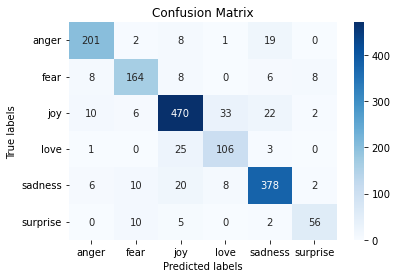

In [73]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=my_classes, yticklabels=my_classes, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()